In [72]:
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

CLIENT_ID = os.getenv("CLIENT_ID")
CLIENT_SECRET = os.getenv("CLIENT_SECRET")

### Connect to Spotify API

In [73]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Set up Spotify connection
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

print("Connected to Spotify API!")

Connected to Spotify API!


### Get the top 10 tracks for an artist

In [74]:
# Artist's Spotify ID for John Legend
john_legend_id = "5y2Xq6xcjJb2jVM54GHK3t"

# Get the top 10 tracks of the artist
top_tracks = sp.artist_top_tracks(john_legend_id)

# Process the response to keep only the relevant data
tracks_data = []
for track in top_tracks['tracks'][:10]:
    track_name = track['name']
    popularity = track['popularity']
    duration_ms = track['duration_ms']
    duration_min = round(duration_ms / 60000, 2)  # Convert ms to minutes
    tracks_data.append({
        "name": track_name,
        "popularity": popularity,
        "duration_minutes": duration_min
    })

# Display the processed data
print("Top 10 Tracks by John Legend:")
for idx, track in enumerate(tracks_data):
    print(f"{idx + 1}. {track['name']} | Popularity: {track['popularity']} | Duration: {track['duration_minutes']} mins")


Top 10 Tracks by John Legend:
1. All of Me | Popularity: 83 | Duration: 4.49 mins
2. What Christmas Means to Me (feat. Stevie Wonder) | Popularity: 68 | Duration: 2.67 mins
3. Bring Me Love | Popularity: 63 | Duration: 3.32 mins
4. You Deserve It All | Popularity: 66 | Duration: 3.31 mins
5. Minefields | Popularity: 61 | Duration: 3.18 mins
6. Baby, It's Cold Outside (feat. Kelly Clarkson) | Popularity: 65 | Duration: 3.65 mins
7. Beauty and the Beast | Popularity: 62 | Duration: 3.8 mins
8. The Christmas Song (Chestnuts Roasting On An Open Fire) (duet with John Legend) | Popularity: 54 | Duration: 3.5 mins
9. This Christmas | Popularity: 52 | Duration: 3.05 mins
10. On Time (with John Legend) | Popularity: 61 | Duration: 2.82 mins


### Convert to Pandas DataFrame

In [75]:
import pandas as pd

# Convert the tracks data into a Pandas DataFrame
df_tracks = pd.DataFrame(tracks_data)

pd.set_option('display.expand_frame_repr', False)

# Display the DataFrame
print(df_tracks)


                                                                              name  popularity  duration_minutes
0                                                                        All of Me          83              4.49
1                                 What Christmas Means to Me (feat. Stevie Wonder)          68              2.67
2                                                                    Bring Me Love          63              3.32
3                                                               You Deserve It All          66              3.31
4                                                                       Minefields          61              3.18
5                                   Baby, It's Cold Outside (feat. Kelly Clarkson)          65              3.65
6                                                             Beauty and the Beast          62              3.80
7  The Christmas Song (Chestnuts Roasting On An Open Fire) (duet with John Legend)          54  

In [76]:
# Sort the DataFrame by the 'popularity' column in descending order
df_tracks_sorted = df_tracks.sort_values(by="popularity", ascending=False)

# Display the sorted DataFrame
print(df_tracks_sorted)


                                                                              name  popularity  duration_minutes
0                                                                        All of Me          83              4.49
1                                 What Christmas Means to Me (feat. Stevie Wonder)          68              2.67
3                                                               You Deserve It All          66              3.31
5                                   Baby, It's Cold Outside (feat. Kelly Clarkson)          65              3.65
2                                                                    Bring Me Love          63              3.32
6                                                             Beauty and the Beast          62              3.80
4                                                                       Minefields          61              3.18
9                                                       On Time (with John Legend)          61  

### Analysis of DataFrame

Linear Regression Equation: y = 9.16x + 32.55
R² Value: 0.32


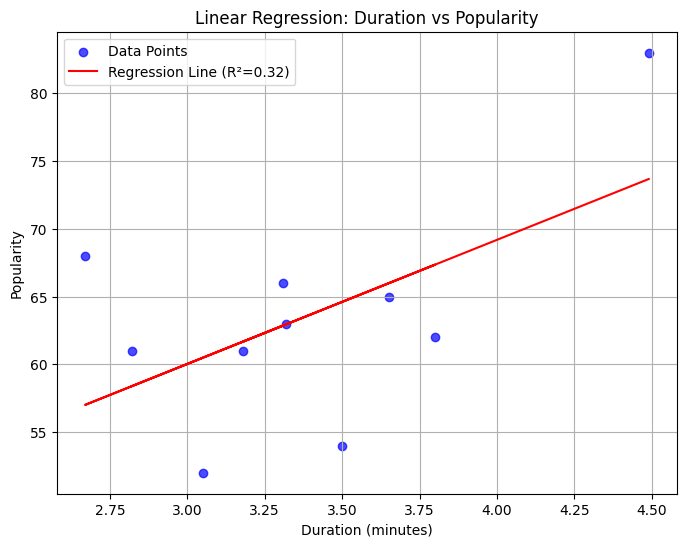

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Prepare data
X = df_tracks[['duration_minutes']].values  # Independent variable (2D array for scikit-learn)
y = df_tracks['popularity'].values  # Dependent variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the regression line
y_pred = model.predict(X)  # Predictions for the regression line

# Coefficients and R² score
slope = model.coef_[0]  # Slope of the line
intercept = model.intercept_  # Intercept of the line
r_squared = model.score(X, y)  # R² value

print(f"Linear Regression Equation: y = {slope:.2f}x + {intercept:.2f}")
print(f"R² Value: {r_squared:.2f}")

# Plot the scatter plot and regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.7, label='Data Points')
plt.plot(X, y_pred, color='red', label=f'Regression Line (R²={r_squared:.2f})')
plt.title('Linear Regression: Duration vs Popularity')
plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')
plt.legend()
plt.grid(True)
plt.show()


In [78]:
correlation = df_tracks['duration_minutes'].corr(df_tracks['popularity'])
print(f"Correlation: {correlation}")


Correlation: 0.5663299483394114


### Based on the linear regression R2 and the correlation figure shown above, we can infer that there is a moderate positive relationship between song duration and popularity.
